<a href="https://colab.research.google.com/github/suhvin/ybigta-edu/blob/master/%E1%84%80%E1%85%B5%E1%84%8E%E1%85%A9%E1%84%90%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A8%26%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_0727_%EC%84%9C%EA%B8%B0%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60점만점에 40점 이상시 통과입니다~

## Q1. 통계분석 (50점)

아래의 df는 타이타닉 데이터셋에서 추출된 표본이다. 적절한 전처리를 한 뒤 통계분석을 수행하시오.

### 신뢰구간 (25점)

Age 변수의 분포를 시각화하고, 분포를 묘사하시오. (10점)

    - 중앙 (3점)
    - 분산 (3점)
    - 모양과 이상치 유무 (4점)
    
    
표본의 평균 나이로 95% 신뢰구간을 구축하시오. (15점)

    - 신뢰구간 선정 (5점)
    - 구간 계산 (5점)
    - 구간 해석 (5점)
    
### 가설검정 (25점)

살아남은 사람들의 평균 나이와 그렇지 못한 사람들의 평균 나이에 차이가 있습니까?

    - 가설 (5점)
    - 검정 선택 후 가정 확인 (10점)
    - 통계량 계산 (5점)
    - 결과 해석 (5점)

주의! 세션에서는 단일표본 t 검정을 했지만, 여기엔 모집단이 두개입니다!


<details>
    <summary>힌트는 <font color="red"><b>여기를 클릭</b></font></summary>
  
  만약 직접 t 통계량을 계산하기 까다롭다면, scipy.stats.ttest_ind_from_stats를 사용해 봅시다.
    
  scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')
</details>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/와이빅타/교육세션/submit/ybigta-edu/0727/train.csv')
df = df.sample(75, random_state=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [3]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,28.234375,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,28.234375,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.000000,0,2,F.C.C. 13529,26.2500,NaN,S


In [ ]:
# 신뢰구간

In [15]:
df['Age'].describe()

count    75.000000
mean     28.234375
std      11.626789
min       1.000000
25%      22.000000
50%      28.000000
75%      35.000000
max      61.000000
Name: Age, dtype: float64

In [16]:
# 중앙 (3점) 분산 (3점)
print("평균 : ", str(df['Age'].mean()))
print("분산 : ", str(df['Age'].std() ** 2))

평균 :  28.234375
분산 :  135.18222128378378


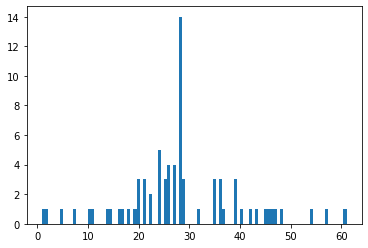

In [18]:
# 모양과 이상치 유무 (4점)
plt.hist(df['Age'], bins=100)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f6195d8e590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6195d94610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6195d9a650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6195d9a110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6195d8eb50>,
  <matplotlib.lines.Line2D at 0x7f6195d940d0>]}

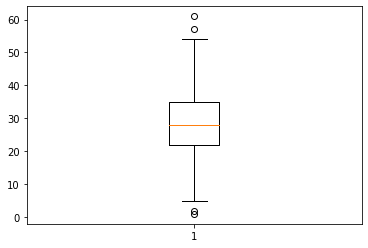

In [19]:
plt.boxplot(df['Age'])

In [22]:
# 신뢰구간 선정 (5점)
x = df['Age'].mean()
cv = 1.96
n = 75


std_d = df['Age'].std()
std_e = std_d/np.sqrt(n)

In [23]:
# 구간 계산 (5점)
c = (x-cv*std_e, x+cv*std_e)
print(c)

(25.60298494584286, 30.86576505415714)


In [24]:
# 구간 해석 (5점)
# 많은 샘플 추출 시 그 표본의 평균은 95%로 모평균이 포함된다.   

In [8]:
# 가설검정 : 살아남은 사람들의 평균 나이와 그렇지 못한 사람들의 평균 나이에 차이가 있습니까?
# 가설 (5점)
print(df.loc[df['Survived'] == 1]['Age'].mean())
# 26.810546875
print(df.loc[df['Survived'] == 0]['Age'].mean())
# 29.293968023255815
# 가설 : 사망자들의 평균연령과 생존자들의 평균연령이 같다

26.810546875
29.293968023255815


In [13]:
# 검정 선택 후 가정 확인 (10점)
# 모분산을 모르고 평균에 대한 검정을 할 때는 t검정 활용 -> 2개 표본에 대한 t검정
# 귀무 : mu_live - mu_die = 0
# 대립 : mu_live - mu_die != 0

# 통계량 계산 (5점)
mean_live = df.loc[df['Survived']==1].Age.mean()
mean_die = df.loc[df['Survived']==0].Age.mean()
std_live = df.loc[df['Survived']==1].Age.std()
std_die = df.loc[df['Survived']==0].Age.std()
n_live = len(df.loc[df['Survived']==1])
n_die = len(df.loc[df['Survived']==0])

scipy.stats.ttest_ind_from_stats(mean_live, std_live, n_live, mean_die, std_die, n_die, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-0.9138710555393881, pvalue=0.3637931994699718)

In [ ]:
# 결과 해석 (5점)
# 0.05보다 pvalue가 커서 귀무가설이 기각되지 않는다 -> 생존자 집단과 사망자 집단의 연령의 모평균이 같지 않지 않다

## Q2. 회귀분석

다음 데이터셋에 대해 두가지 방법으로 회귀식을 도출하시오

In [ ]:
reviews = pd.read_excel('reviews.xlsx')
x = reviews['kakao'].values
y = reviews['naver'].values

### Ordinary Least Squares (10점)

다음 수식을 numpy를 사용하여 재현해보시오

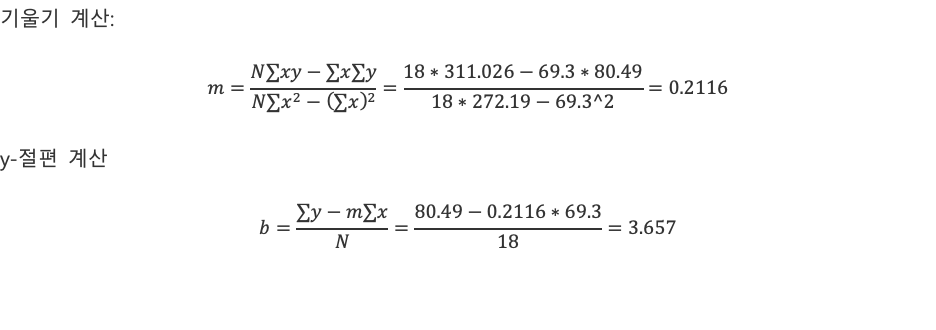


In [ ]:
m = None
b = None

### Gradient Descent (Optional, 10점)

Why gradient descent? 물론 기울기와 y절편을 한방에 찾아내는 공식이 있지만, 데이터가 많아질수록 너무 복잡해지는 (O(n^3)) 문제점이 있습니다. 이를 조금 완화시키고자 경사하강법을 사용합니다.

[Intuition](https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer)

아래의 수식을 넘파이로 구현해 봅시다.

사진출처: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

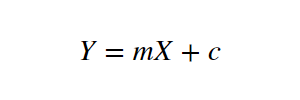

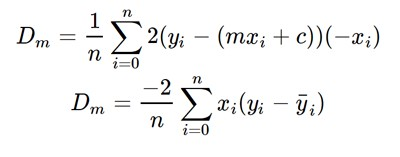

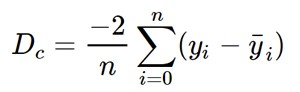

그 후, 적절한 iterations와 learning rate 를 찾아 위의 결과를 재현해 봅시다!

In [ ]:
m = 0
c = 0
n = len(x)

# 얼마나 반복해야 할까요?
iterations = None

# 한번에 얼마나 update 해야 할까요?
learning_rate = None
    
for i in range(iterations):
    
    # Calculate predictions
    yhat = None

    # Calculate mean squares
    mean_squares = None
    
    if i % 100 == 0:
        print(f'Iteration {i}: {mean_squares:.4f}')
        print(f'y = {m:.3f}x + {c:.3f}')
        
    # Calculate gradient
    dm = None
    dc = None
    
    # Update parameters
    m = m - learning_rate * dm
    c = c - learning_rate * dc